<a href="https://colab.research.google.com/github/jadesola123/RetailEDA/blob/main/RetailEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#reading the csv file
url="https://raw.githubusercontent.com/jadesola123/RetailEDA/main/SampleSuperstore%20(1).csv"
Superstore= pd.read_csv(url)

#checking for missing values
Superstore.isna().sum() #no missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [29]:
#understanding the dataset
print(Superstore.head())
print("the shape of this dataset is:" , Superstore.shape)
print(Superstore.describe())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

Quantity of products sold 

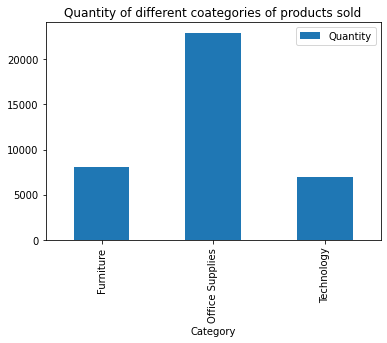

In [6]:
Products_sold= Superstore.groupby('Sub-Category').agg({'Quantity': 'sum'}).sort_values(by='Quantity',ascending=False)
Categories_sold= Superstore.groupby('Category').agg({'Quantity': 'sum'})
Categories_sold.plot(kind="bar", title="Quantity of different coategories of products sold")
plt.show()

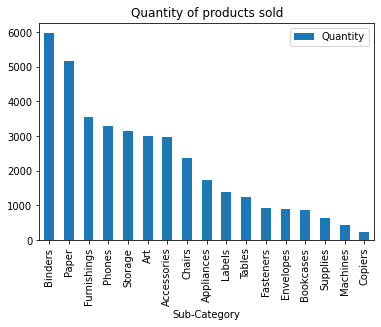

In [7]:
Products_sold.plot(kind="bar", title="Quantity of products sold")
plt.show()

Sales of each Category & sub-category of product

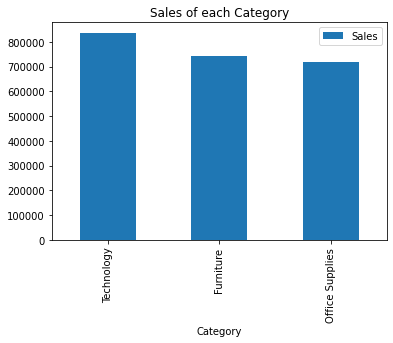

In [8]:
Cat_sales=Superstore.groupby('Category').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
Cat_sales.plot(kind="bar", title="Sales of each Category")
plt.show()

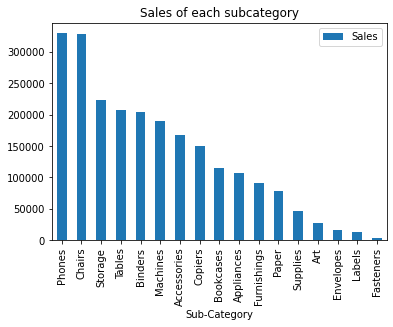

In [9]:
Product_sales=Superstore.groupby('Sub-Category').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
Product_sales.plot(kind="bar", title="Sales of each subcategory")
plt.show()

Profits from the Categories & Subcategories sold

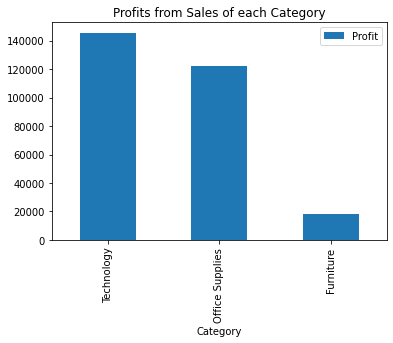

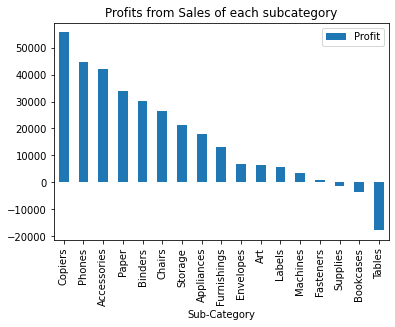

In [10]:
Cat_profit=Superstore.groupby('Category').agg({'Profit': 'sum'}).sort_values(by='Profit',ascending=False)
Cat_profit.plot(kind="bar", title="Profits from Sales of each Category")
plt.show()
Product_profit= Superstore.groupby('Sub-Category').agg({'Profit': 'sum'}).sort_values(by='Profit',ascending=False)
Product_profit.plot(kind="bar", title="Profits from Sales of each subcategory" )
plt.show()

Analaysis of Sales, Profit and Quantity sold by Segment

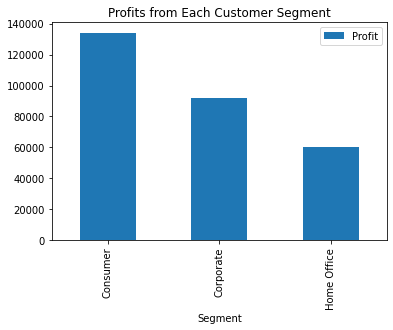

                    Sales
Segment                  
Consumer     1.161401e+06
Corporate    7.061464e+05
Home Office  4.296531e+05


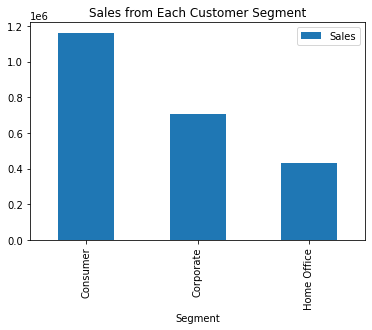

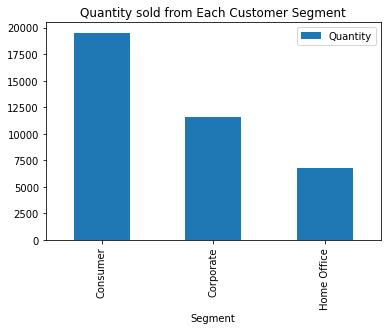

In [27]:
profit_segment = pd.DataFrame(Superstore.groupby(['Segment']).sum()['Profit'])
profit_segment.sort_values(by=['Profit'], inplace = True, ascending = False)
profit_segment.plot(kind="bar",title="Profits from Each Customer Segment")
plt.show()
sales_segment = pd.DataFrame(Superstore.groupby(['Segment']).sum()['Sales'])
sales_segment.sort_values(by=['Sales'], inplace = True, ascending = False)
print(sales_segment)
sales_segment.plot(kind="bar",title="Sales from Each Customer Segment")
plt.show()
quantity_segment = pd.DataFrame(Superstore.groupby(['Segment']).sum()['Quantity'])
quantity_segment.sort_values(by=['Quantity'], inplace = True, ascending = False)
quantity_segment.plot(kind="bar",title="Quantity sold from Each Customer Segment")
plt.show()

Analaysis of Sales, Profit and Quantity sold by States

In [11]:
state_group = Superstore.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


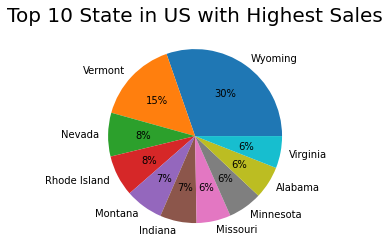

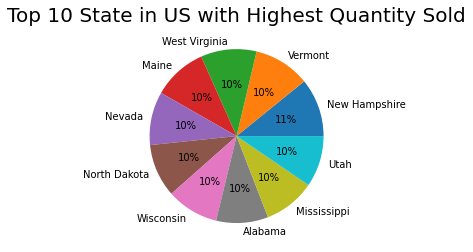

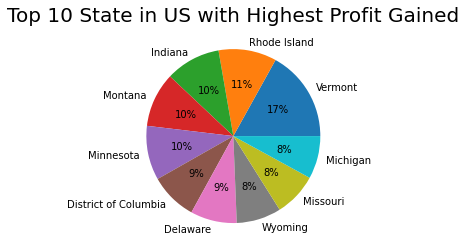

In [13]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

Analaysis of Sales, Profit and Quantity sold by Region

In [23]:
region_group = Superstore.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
sorted_sales1 = region_group.sort_values(['Sales'], 
                                        ascending=False)
sorted_quantity2 = region_group.sort_values(['Quantity'], 
                                        ascending=False)
sorted_profit3 = region_group.sort_values(['Profit'], 
                                        ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


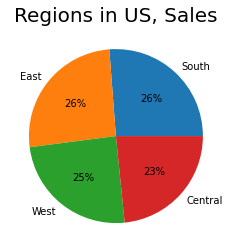

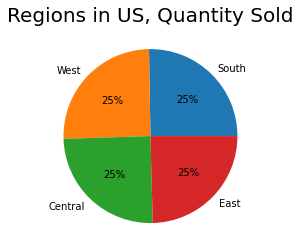

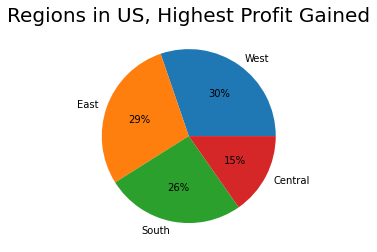

In [24]:
sales_values = sorted_sales1.Sales
quantity_values = sorted_quantity2.Quantity
profit_values = sorted_profit3.Profit

sales_labels = sorted_sales1.Region
quantity_labels = sorted_quantity2.Region
profit_labels = sorted_profit3.Region

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Regions in US, Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Regions in US, Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Regions in US, Highest Profit Gained", fontsize=20)
plt.show()

In [25]:
shipmode_group = Superstore.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


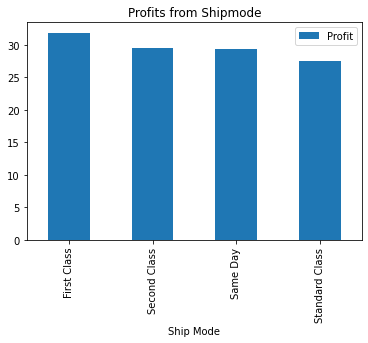

                     Sales
Ship Mode                 
Same Day        236.396179
Second Class    236.089239
First Class     228.497024
Standard Class  227.583067


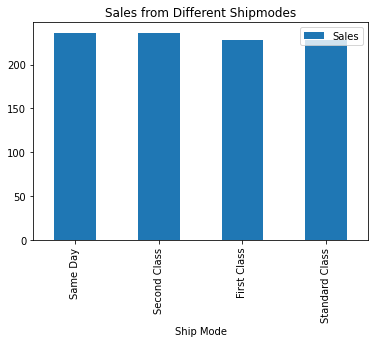

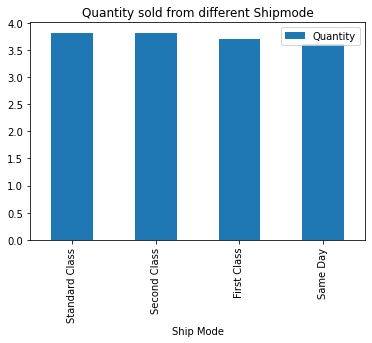

In [38]:
profit_sm = pd.DataFrame(Superstore.groupby(['Ship Mode']).mean()['Profit'])
profit_sm.sort_values(by=['Profit'], inplace = True, ascending = False)
profit_sm.plot(kind="bar",title="Profits from Shipmode")
plt.show()
sales_sm = pd.DataFrame(Superstore.groupby(['Ship Mode']).mean()['Sales'])
sales_sm.sort_values(by=['Sales'], inplace = True, ascending = False)
print(sales_sm)
sales_sm.plot(kind="bar",title="Sales from Different Shipmodes")
plt.show()
quantity_sm = pd.DataFrame(Superstore.groupby(['Ship Mode']).mean()['Quantity'])
quantity_sm.sort_values(by=['Quantity'], inplace = True, ascending = False)
quantity_sm.plot(kind="bar",title="Quantity sold from different Shipmode")
plt.show()

Analaysis of Sales, Profit and Quantity sold by Shipmode 

From the Exploratory Daata Analysis done, we can see that

* Technology Category are in demand. So if production in this field will be more, then company can get more profit.
* Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.
* People in the South and East prefer most of the goods. Company must spread out their products in these part of US.
* Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.
* Wyoming State have highest sales and Vermont State have the highest Profit. Company could possibly place all types of products in these states for more profit and sales.